In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
glass=pd.read_csv("glass.csv")

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
glass.shape

(214, 10)

In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [9]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

## Data visualization

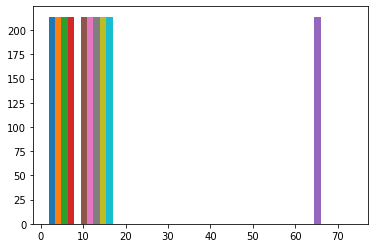

In [23]:
plt.hist(glass,bins=4)
plt.show()

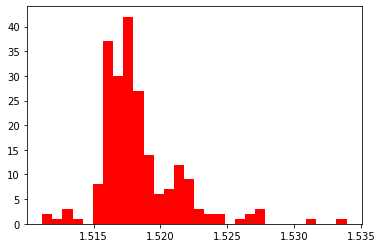

In [26]:
plt.hist(glass['RI'],bins = 30,color='r')
plt.show()

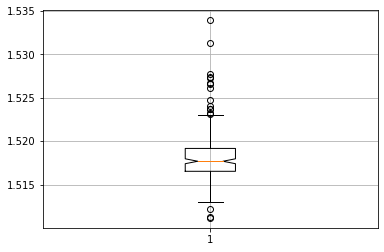

In [31]:
plt.boxplot([glass['RI']],[glass['Mg']])
plt.grid(True)
plt.show()

C:\Users\HANMANT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


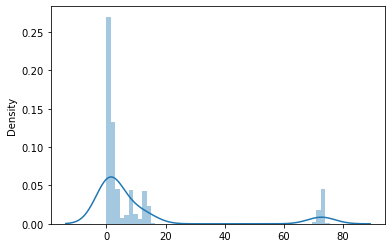

In [41]:
sns.distplot(glass)
plt.show()

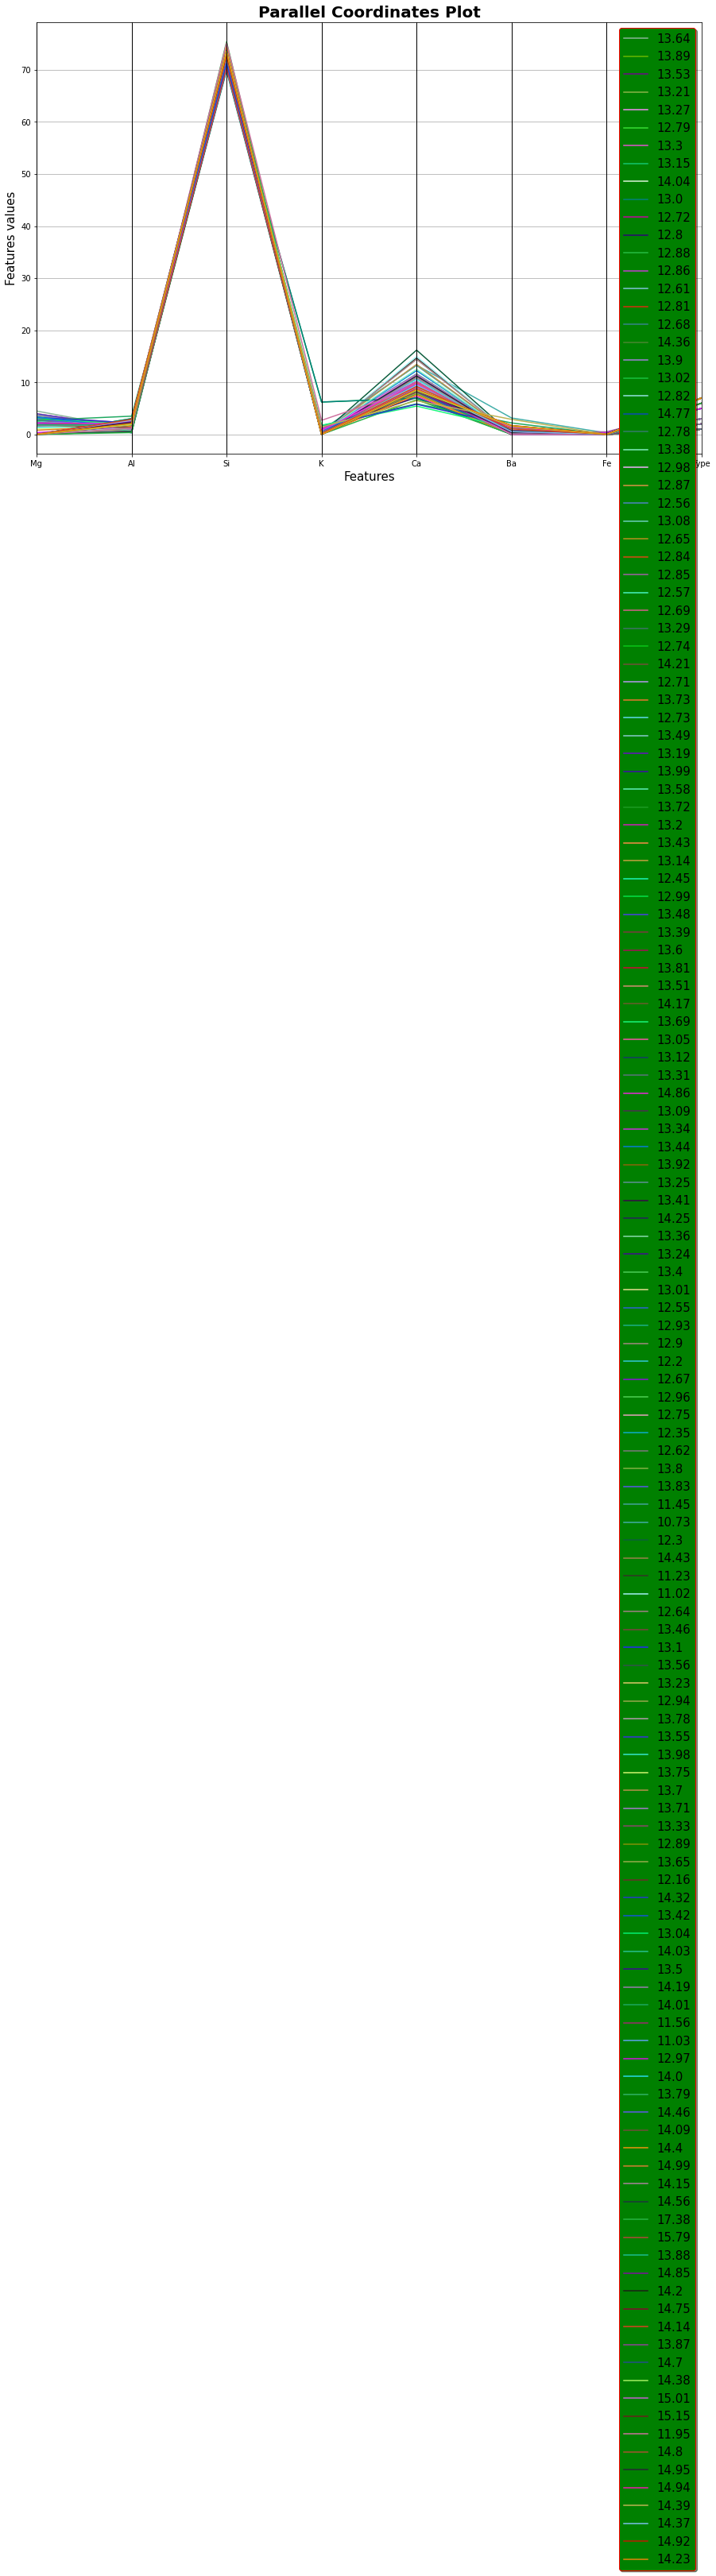

In [46]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(glass.drop("RI", axis=1), "Na")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="green", edgecolor="red")
plt.show()

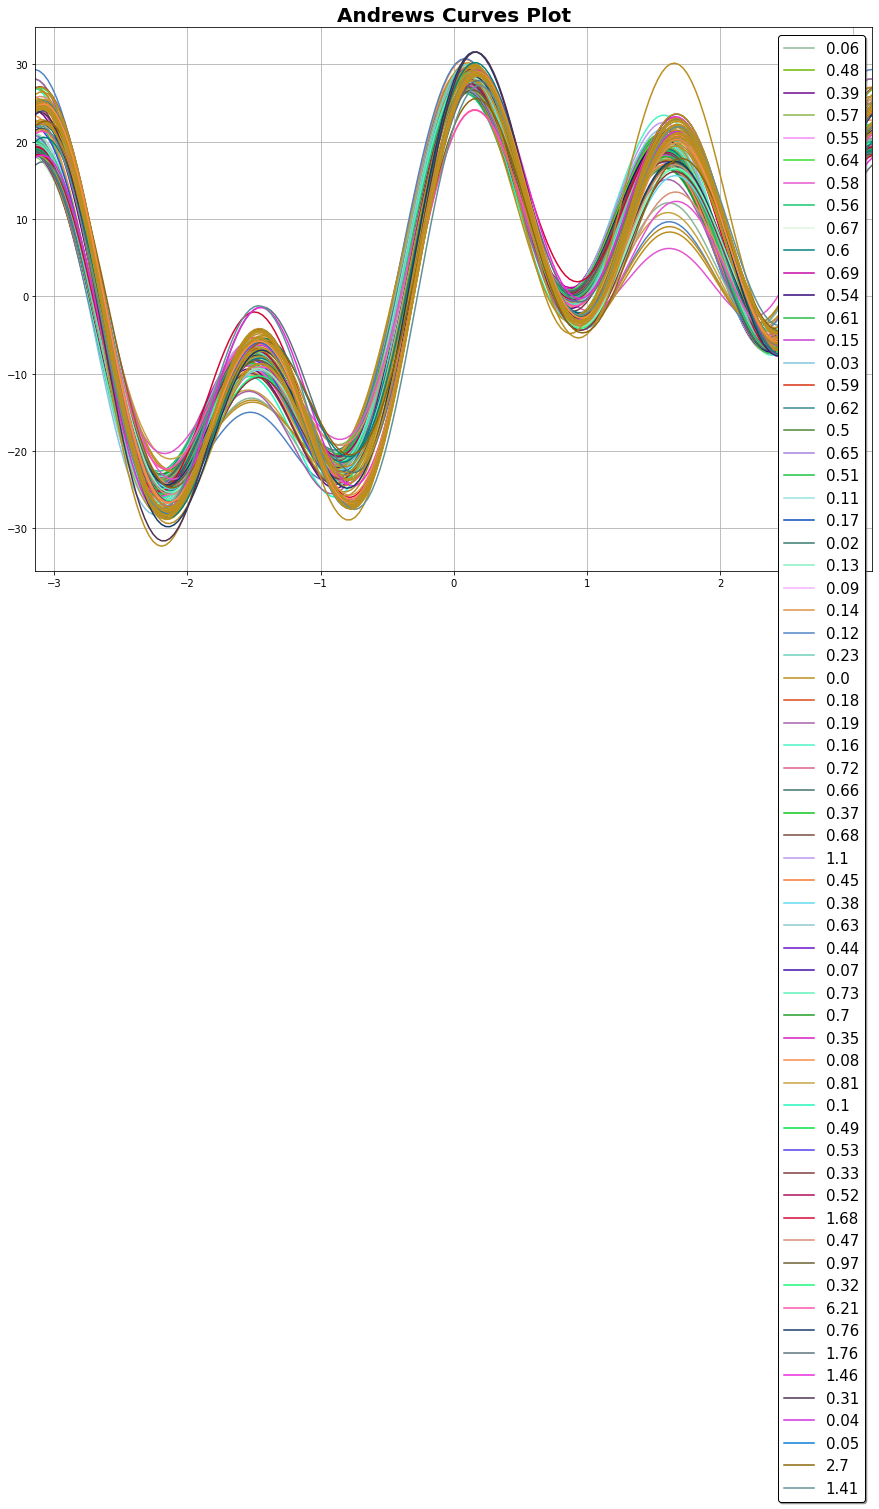

In [43]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(glass.drop("Si", axis=1), "K")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

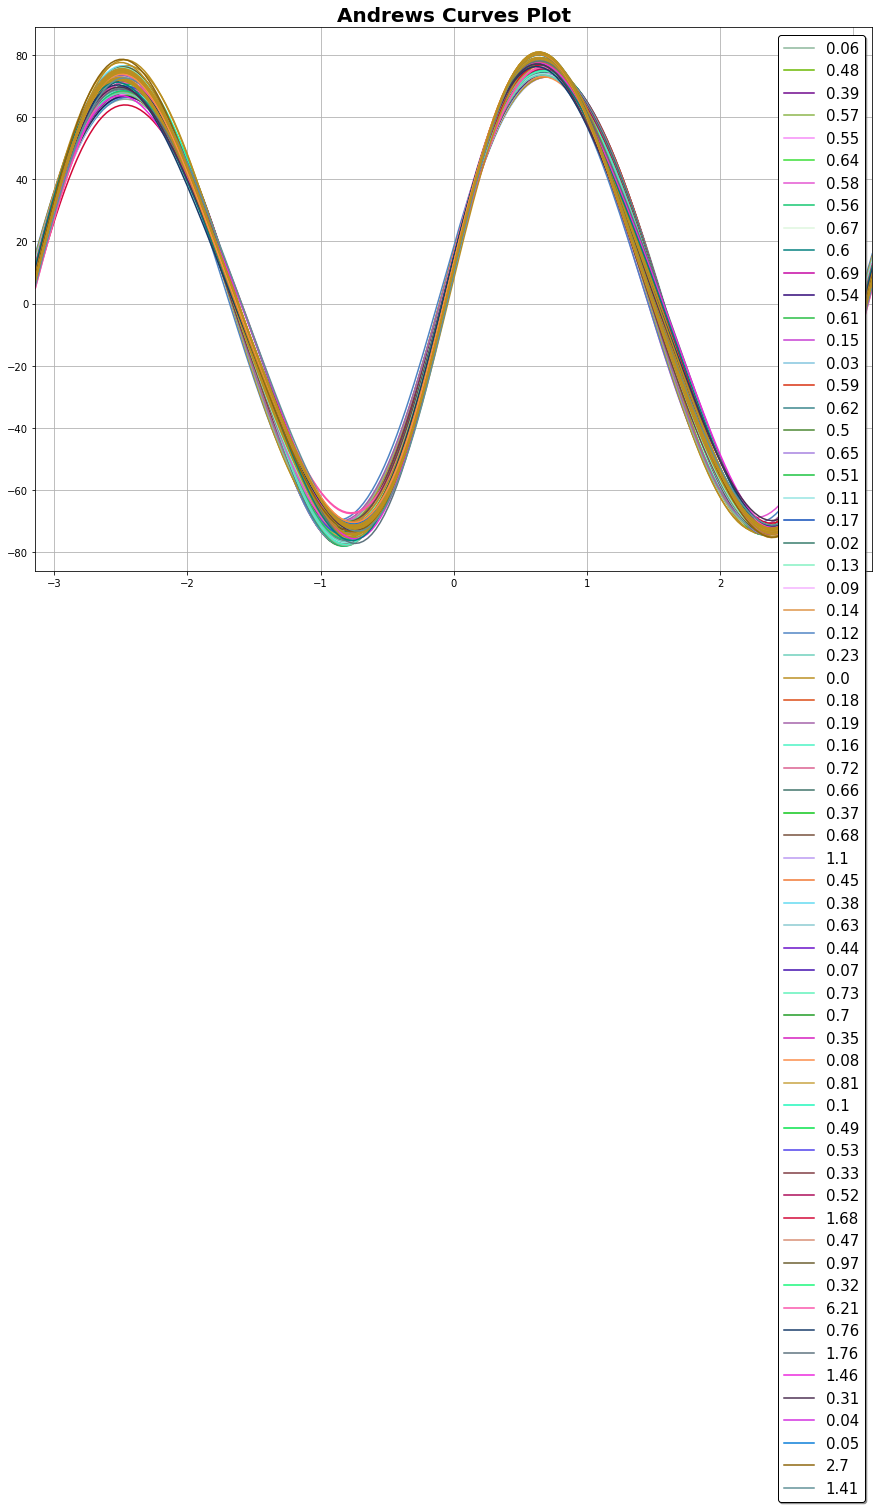

In [44]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(glass.drop("Na", axis=1), "K")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

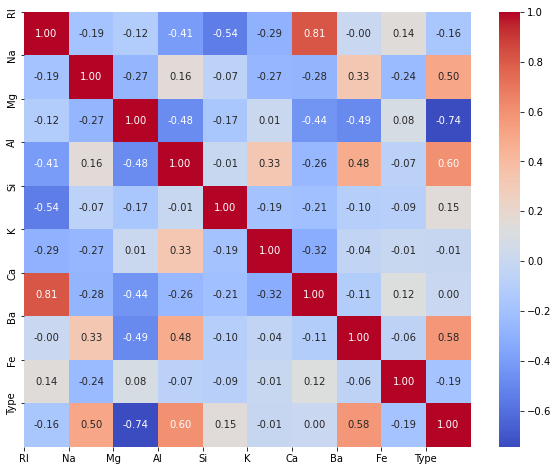

In [8]:
corr = glass.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [9]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [10]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

classifier_lr = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())]


lr_pipe = Pipeline(steps)

In [12]:
from sklearn.model_selection import train_test_split
X = glass.values[:, 0:9]

In [13]:
Y = glass.values[:, 9]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.score(X_train,y_train)*100

79.19463087248322

In [16]:
knn.score(X_test,y_test)*100

64.61538461538461

In [17]:
hanmant=knn.predict(X_test)

In [18]:
hanmant

array([1., 7., 1., 7., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 6., 5., 6.,
       1., 3., 7., 2., 7., 7., 7., 1., 1., 1., 1., 5., 1., 2., 2., 3., 2.,
       1., 7., 5., 1., 1., 2., 2., 7., 3., 2., 3., 2., 6., 2., 6., 1., 3.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 7., 2.])

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(hanmant,y_test))

              precision    recall  f1-score   support

         1.0       0.68      0.57      0.62        23
         2.0       0.65      0.71      0.68        21
         3.0       0.50      0.40      0.44         5
         5.0       0.50      1.00      0.67         3
         6.0       0.33      0.25      0.29         4
         7.0       0.80      0.89      0.84         9

    accuracy                           0.65        65
   macro avg       0.58      0.64      0.59        65
weighted avg       0.65      0.65      0.64        65



In [22]:
 
#to split train and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(glass,test_size=0.3,random_state=0)

In [23]:
#to find best k value
from sklearn.neighbors import KNeighborsClassifier as KNC

acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

In [24]:
#from plots at k=5 we get best model
#model building at k=5 
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
pred_train=neigh.predict(train.iloc[:,0:9])

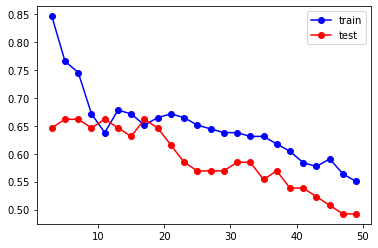

In [25]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test']);

In [26]:
#from plots at k=5 we get best model
#model building at k=5 
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
pred_train=neigh.predict(train.iloc[:,0:9])
train_acc=np.mean(pred_train==train.iloc[:,9])
train_acc#0.76
pred_test=neigh.predict(test.iloc[:,0:9])
test_acc=np.mean(pred_test==test.iloc[:,9])
test_acc#0.661

0.6615384615384615